In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split

import math

df = pd.read_csv('GDP_Satisfaction.csv')

In [2]:
x = df['GDP'].values / 10000
x = x.reshape(-1, 1)
y = df['Satisfaction'].values.reshape(-1, 1)

In [18]:
x

array([[ 3.9343],
       [ 4.6205],
       [ 3.7731],
       [ 4.3525],
       [ 3.9891],
       [ 5.6642],
       [ 6.015 ],
       [ 5.4445],
       [ 6.4445],
       [ 5.7189],
       [ 6.3218],
       [ 5.5794],
       [ 5.6957],
       [ 5.7081],
       [ 6.1111],
       [ 6.7938],
       [ 6.6029],
       [ 8.3088],
       [ 8.1363],
       [ 9.394 ],
       [ 9.1738],
       [ 9.8273],
       [10.1302],
       [11.3812],
       [10.9431],
       [10.5582],
       [11.6969],
       [11.2635],
       [12.2391],
       [12.1872]])

In [19]:
y

array([[ 1.1],
       [ 1.3],
       [ 1.5],
       [ 2. ],
       [ 2.2],
       [ 2.9],
       [ 3. ],
       [ 3.2],
       [ 3.2],
       [ 3.7],
       [ 3.9],
       [ 4. ],
       [ 4. ],
       [ 4.1],
       [ 4.5],
       [ 4.9],
       [ 5.1],
       [ 5.3],
       [ 5.9],
       [ 6. ],
       [ 6.8],
       [ 7.1],
       [ 7.9],
       [ 8.2],
       [ 8.7],
       [ 9. ],
       [ 9.5],
       [ 9.6],
       [10.3],
       [10.5]])

In [3]:
poly = PolynomialFeatures(degree = 11)
modified_x = poly.fit_transform(x)

In [4]:
x_train, x_test, y_train, y_test = train_test_split(modified_x, y, test_size = 0.30, random_state = 1)

In [5]:
reg = Lasso(alpha = 0.5)
reg.fit(x_train, y_train)

C:\Users\niranjans3ln\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.459742548950908, tolerance: 0.018334285714285716
  model = cd_fast.enet_coordinate_descent(


Lasso(alpha=0.5)

In [6]:
print('Lasso Train RMSE : ', math.sqrt(mean_squared_error(y_train, reg.predict(x_train))))
print('Lasso Test RMSE : ', math.sqrt(mean_squared_error(y_test, reg.predict(x_test))))


Lasso Train RMSE :  0.5835117840540666
Lasso Test RMSE :  0.7027611671127949


In [7]:
reg = Ridge(alpha = 0.5)
reg.fit(x_train, y_train)

C:\Users\niranjans3ln\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.6939e-25): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,


Ridge(alpha=0.5)

In [8]:
print('Ridge Train RMSE : ', math.sqrt(mean_squared_error(y_train, reg.predict(x_train))))
print('Ridge Test RMSE : ', math.sqrt(mean_squared_error(y_test, reg.predict(x_test))))


Ridge Train RMSE :  0.5544201020755195
Ridge Test RMSE :  0.5545864015366629


<ipython-input-11-a41b8bcdba0f>:12: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  reg.fit(x_train, y_train)
C:\Users\niranjans3ln\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\Users\niranjans3ln\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.526645580232228, tolerance: 0.018334285714285716
  model = cd_fast.enet_coordinate_descent(
C:\Users\niranjans3ln\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.837814934785621, tolerance: 0.0183342857142857

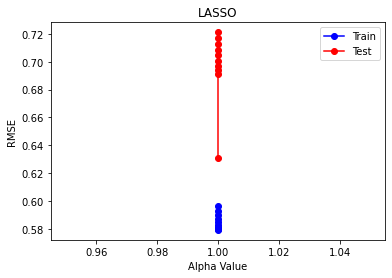

In [11]:
train_err = []
test_err = []
poly_11 = PolynomialFeatures(degree = 11)
modified_x = poly_11.fit_transform(x)

x_train, x_test, y_train, y_test = train_test_split(modified_x, y, test_size = 0.30, random_state = 1)

alpha_vals = np.linspace(0, 1, 10)

for alpha_v in alpha_vals:
    reg = Lasso(alpha = alpha_v)
    reg.fit(x_train, y_train)
    
    train_err.append(math.sqrt(mean_squared_error(y_train, reg.predict(x_train))))
    test_err.append(math.sqrt(mean_squared_error(y_test, reg.predict(x_test))))

plt.title('LASSO')
plt.xlabel('Alpha Value')
plt.ylabel('RMSE')
plt.plot(np.linspace(1, 1, 10), train_err, 'bo-', label = 'Train')
plt.plot(np.linspace(1, 1, 10), test_err, 'ro-', label = 'Test')
plt.legend()
plt.show()

C:\Users\niranjans3ln\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.04543e-26): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Users\niranjans3ln\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.28778e-25): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Users\niranjans3ln\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.88851e-25): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Users\niranjans3ln\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.42164e-25): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Users\niranjans3ln\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.966

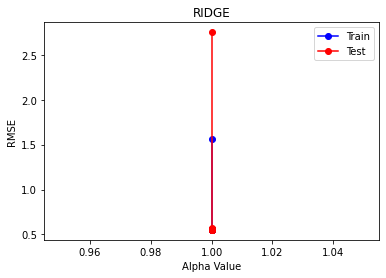

In [12]:
train_err = []
test_err = []
poly_11 = PolynomialFeatures(degree = 11)
modified_x = poly_11.fit_transform(x)

x_train, x_test, y_train, y_test = train_test_split(modified_x, y, test_size = 0.30, random_state = 1)

alpha_vals = np.linspace(0, 1, 10)

for alpha_v in alpha_vals:
    reg = Ridge(alpha = alpha_v)
    reg.fit(x_train, y_train)
    
    train_err.append(math.sqrt(mean_squared_error(y_train, reg.predict(x_train))))
    test_err.append(math.sqrt(mean_squared_error(y_test, reg.predict(x_test))))

plt.title('RIDGE')
plt.xlabel('Alpha Value')
plt.ylabel('RMSE')
plt.plot(np.linspace(1, 1, 10), train_err, 'bo-', label = 'Train')
plt.plot(np.linspace(1, 1, 10), test_err, 'ro-', label = 'Test')
plt.legend()
plt.show()